# Imported Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics

# Loading the Datasets

In [2]:
df = pd.read_csv('Fashion.csv')

In [3]:
df.head(1)

,p_id,name,products,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,"Kurta, Palazzos, Dupatta",5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."


# Cleaning the Datasets

In [4]:
# Drop a column named 'description'
df = df.drop('description', axis=1)

In [5]:
# Drop a column named 'p_attributes'
df = df.drop('p_attributes', axis=1)

In [6]:
# Round the values in 'avg_rating' column to two decimal places
df['avg_rating'] = df['avg_rating'].astype(float).round(2)

In [7]:
# Replace NaN values with a specific integer, e.g., 0
df['ratingcount'] = df['ratingCount'].fillna(0)

In [8]:
# Convert the values in 'ratingcount' column to integers
df['ratingcount'] = df['ratingcount'].astype(int)

In [9]:
df.head(1)

,p_id,name,products,price,colour,brand,img,ratingCount,avg_rating,ratingcount
0,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,"Kurta, Palazzos, Dupatta",5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.42,4522


In [10]:
# Check for null values in the DataFrame
null_counts = df.isnull().sum()

# Display the count of null values in each column
print(null_counts)

p_id              0
name              0
products          0
price             0
colour            0
brand             0
img               0
ratingCount    7684
avg_rating     7684
ratingcount       0
dtype: int64


In [11]:
# Fill null values in 'ratingCount' and 'avg_rating' columns with 0
df['ratingCount'] = df['ratingCount'].fillna(0)
df['avg_rating'] = df['avg_rating'].fillna(0)

# Convert the values in 'ratingCount' to integers after filling null values
df['ratingCount'] = df['ratingCount'].astype(int)

In [14]:
# Check for null values in the DataFrame
null_counts = df.isnull().sum()

# Display the count of null values in each column
print(null_counts)

p_id           0
name           0
products       0
price          0
colour         0
brand          0
img            0
ratingCount    0
avg_rating     0
ratingcount    0
dtype: int64


In [12]:
# Rename the column 'name' to 'product_name'
df.rename(columns={'name': 'product_name'}, inplace=True)

# Verify the column names
print(df.columns)


Index(['p_id', 'product_name', 'products', 'price', 'colour', 'brand', 'img',
       'ratingCount', 'avg_rating', 'ratingcount'],
      dtype='object')


In [13]:
# Drop a column named 'colour'
df = df.drop('colour', axis=1)

In [14]:
# Drop a column named 'products'
df = df.drop('products', axis=1)

In [15]:
df.head(2)

,p_id,product_name,price,brand,img,ratingCount,avg_rating,ratingcount
0,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Khushal K,http://assets.myntassets.com/assets/images/170...,4522,4.42,4522
1,16524740,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,InWeave,http://assets.myntassets.com/assets/images/165...,1081,4.12,1081


In [16]:
# Drop a column named 'ratingCount'
df = df.drop('ratingCount', axis=1)

In [17]:
df.head(2)

,p_id,product_name,price,brand,img,avg_rating,ratingcount
0,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Khushal K,http://assets.myntassets.com/assets/images/170...,4.42,4522
1,16524740,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,InWeave,http://assets.myntassets.com/assets/images/165...,4.12,1081


In [18]:
# Selecting numerical features and target variable
X = df[['price', 'ratingcount']]
y = df['avg_rating']

# Training and Testing the Data

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regression model
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
y_pred

# Calculate the predicted values as percentages
y_test_percent = y_test / y_test.max() * 100
y_pred_percent = y_pred / y_test.max() * 100

# Print the predicted values as percentages
print("Predicted Values (Percentage):")
for i in range(len(X_test)):
    print(f"Actual: {y_test_percent.iloc[i]:.2f}%, Predicted: {y_pred_percent[i]:.2f}%")

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")

Predicted Values (Percentage):
Actual: 0.00%, Predicted: 0.00%
Actual: 0.00%, Predicted: 0.00%
Actual: 89.80%, Predicted: 86.30%
Actual: 0.00%, Predicted: 0.00%
Actual: 0.00%, Predicted: 0.00%
Actual: 0.00%, Predicted: 0.00%
Actual: 0.00%, Predicted: 0.00%
Actual: 80.00%, Predicted: 44.35%
Actual: 0.00%, Predicted: 0.00%
Actual: 0.00%, Predicted: 0.00%
Actual: 86.60%, Predicted: 84.69%
Actual: 0.00%, Predicted: 0.00%
Actual: 40.00%, Predicted: 93.53%
Actual: 0.00%, Predicted: 0.00%
Actual: 79.80%, Predicted: 83.58%
Actual: 0.00%, Predicted: 0.00%
Actual: 0.00%, Predicted: 0.00%
Actual: 100.00%, Predicted: 74.15%
Actual: 0.00%, Predicted: 0.00%
Actual: 0.00%, Predicted: 0.00%
Actual: 0.00%, Predicted: 0.00%
Actual: 0.00%, Predicted: 0.00%
Actual: 84.20%, Predicted: 77.94%
Actual: 0.00%, Predicted: 0.00%
Actual: 84.80%, Predicted: 83.74%
Actual: 91.00%, Predicted: 83.49%
Actual: 0.00%, Predicted: 0.00%
Actual: 0.00%, Predicted: 0.00%
Actual: 73.00%, Predicted: 88.09%
Actual: 88.20%, Pred

# Recommendation System

In [22]:
# Print the top recommended product names
print("Top 10 Recommended Products:")
for index, row in df.head(10).iterrows():
    print(f"{row['product_name']} (Avg. Rating: {row['avg_rating']:.2f})")

Top 10 Recommended Products:
Khushal K Women Black Ethnic Motifs Printed Kurta with Palazzos & With Dupatta (Avg. Rating: 4.42)
InWeave Women Orange Solid Kurta with Palazzos & Floral Print Dupatta (Avg. Rating: 4.12)
Anubhutee Women Navy Blue Ethnic Motifs Embroidered Thread Work Kurta with Trousers & With Dupatta (Avg. Rating: 4.16)
Nayo Women Red Floral Printed Kurta With Trouser & Dupatta (Avg. Rating: 4.09)
AHIKA Women Black & Green Printed Straight Kurta (Avg. Rating: 3.98)
Soch Women Red Thread Work Georgette Anarkali Kurta (Avg. Rating: 0.00)
Libas Women Navy Blue Pure Cotton Floral Print Kurta with Palazzos & Dupatta (Avg. Rating: 4.44)
Ahalyaa Women Beige Floral Printed Regular Gotta Patti Kurta with Palazzos & With Dupatta (Avg. Rating: 3.55)
Anouk Women Yellow & White Printed Kurta with Palazzos (Avg. Rating: 4.25)
Khushal K Women Green & Pink Printed Pure Cotton Kurta with Palazzos & Dupatta (Avg. Rating: 4.27)


In [23]:
from IPython.display import Image, display

In [24]:
# Print the top recommended product names with images
print("Top 10 Recommended Products:")
for index, row in df.head(10).iterrows():
    print(f"{row['product_name']} (Avg. Rating: {row['avg_rating']:.2f})")
    display(Image(url=row['img'], width=200, height=200))
    print()

Top 10 Recommended Products:
Khushal K Women Black Ethnic Motifs Printed Kurta with Palazzos & With Dupatta (Avg. Rating: 4.42)



InWeave Women Orange Solid Kurta with Palazzos & Floral Print Dupatta (Avg. Rating: 4.12)



Anubhutee Women Navy Blue Ethnic Motifs Embroidered Thread Work Kurta with Trousers & With Dupatta (Avg. Rating: 4.16)



Nayo Women Red Floral Printed Kurta With Trouser & Dupatta (Avg. Rating: 4.09)



AHIKA Women Black & Green Printed Straight Kurta (Avg. Rating: 3.98)



Soch Women Red Thread Work Georgette Anarkali Kurta (Avg. Rating: 0.00)



Libas Women Navy Blue Pure Cotton Floral Print Kurta with Palazzos & Dupatta (Avg. Rating: 4.44)



Ahalyaa Women Beige Floral Printed Regular Gotta Patti Kurta with Palazzos & With Dupatta (Avg. Rating: 3.55)



Anouk Women Yellow & White Printed Kurta with Palazzos (Avg. Rating: 4.25)



Khushal K Women Green & Pink Printed Pure Cotton Kurta with Palazzos & Dupatta (Avg. Rating: 4.27)


In [25]:
# Print the top recommended product names with images
print("Top 10 Recommended Products (Based on Price):")
for index, row in df.head(10).iterrows():  # Change the number inside head() to display more or fewer products
    print(f"{row['product_name']} (Avg. Rating: {row['avg_rating']:.2f}, Price: {row['price']})")
    display(Image(url=row['img'], width=200, height=200))  # Adjust the image dimensions as needed
    print()

Top 10 Recommended Products (Based on Price):
Khushal K Women Black Ethnic Motifs Printed Kurta with Palazzos & With Dupatta (Avg. Rating: 4.42, Price: 5099.0)



InWeave Women Orange Solid Kurta with Palazzos & Floral Print Dupatta (Avg. Rating: 4.12, Price: 5899.0)



Anubhutee Women Navy Blue Ethnic Motifs Embroidered Thread Work Kurta with Trousers & With Dupatta (Avg. Rating: 4.16, Price: 4899.0)



Nayo Women Red Floral Printed Kurta With Trouser & Dupatta (Avg. Rating: 4.09, Price: 3699.0)



AHIKA Women Black & Green Printed Straight Kurta (Avg. Rating: 3.98, Price: 1350.0)



Soch Women Red Thread Work Georgette Anarkali Kurta (Avg. Rating: 0.00, Price: 3498.0)



Libas Women Navy Blue Pure Cotton Floral Print Kurta with Palazzos & Dupatta (Avg. Rating: 4.44, Price: 3599.0)



Ahalyaa Women Beige Floral Printed Regular Gotta Patti Kurta with Palazzos & With Dupatta (Avg. Rating: 3.55, Price: 6000.0)



Anouk Women Yellow & White Printed Kurta with Palazzos (Avg. Rating: 4.25, Price: 1999.0)



Khushal K Women Green & Pink Printed Pure Cotton Kurta with Palazzos & Dupatta (Avg. Rating: 4.27, Price: 5299.0)


In [27]:
from IPython.display import Image, display

# Sort the DataFrame by price in ascending order
df = df.sort_values(by='price', ascending=True)

# Print the product names with the lowest prices
print("Products with Lowest Prices:")
for i in range(5):  # Loop through the first 10 rows
    product_row = df.iloc[i]
    print(f"{i+1}: {product_row['product_name']} (Avg. Rating: {product_row['avg_rating']:.2f}, Price: {product_row['price']})")
    display(Image(url=product_row['img'], width=200, height=200))  # Adjust the image dimensions as needed
    print()  # Add a newline for better readability


Products with Lowest Prices:
1: max Peach-Coloured Print Top (Avg. Rating: 0.00, Price: 169.0)



2: max Cream Regular Top (Avg. Rating: 4.58, Price: 199.0)



3: max White Regular Top (Avg. Rating: 4.46, Price: 199.0)



4: Juniors by Lifestyle Kids-Girls White Pure Cotton Print Top (Avg. Rating: 0.00, Price: 249.0)



5: Jockey Women Black Pure Cotton Solid Tank Top (Avg. Rating: 4.50, Price: 295.0)


# Data Visalisation

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ganku\AppData\Local\Temp\ipykernel_8312\156244137.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='avg_rating', data=top_10_brands, palette='viridis')


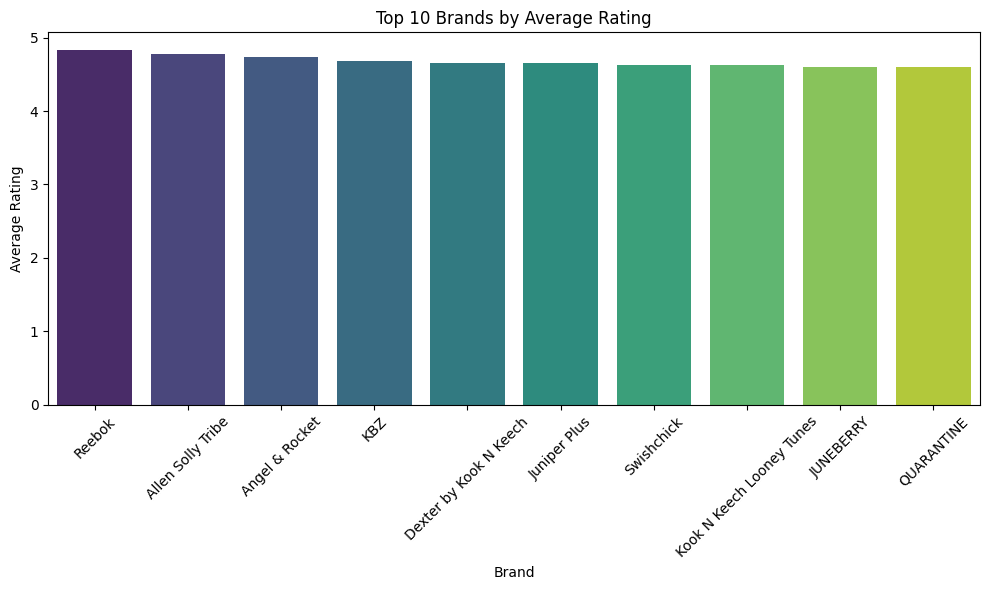

In [30]:
# Aggregate data by brand and calculate average rating
avg_rating_by_brand = df.groupby('brand')['avg_rating'].mean().reset_index()

# Sort by average rating and select top 10 brands
top_10_brands = avg_rating_by_brand.sort_values(by='avg_rating', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='avg_rating', data=top_10_brands, palette='viridis')
plt.title('Top 10 Brands by Average Rating')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

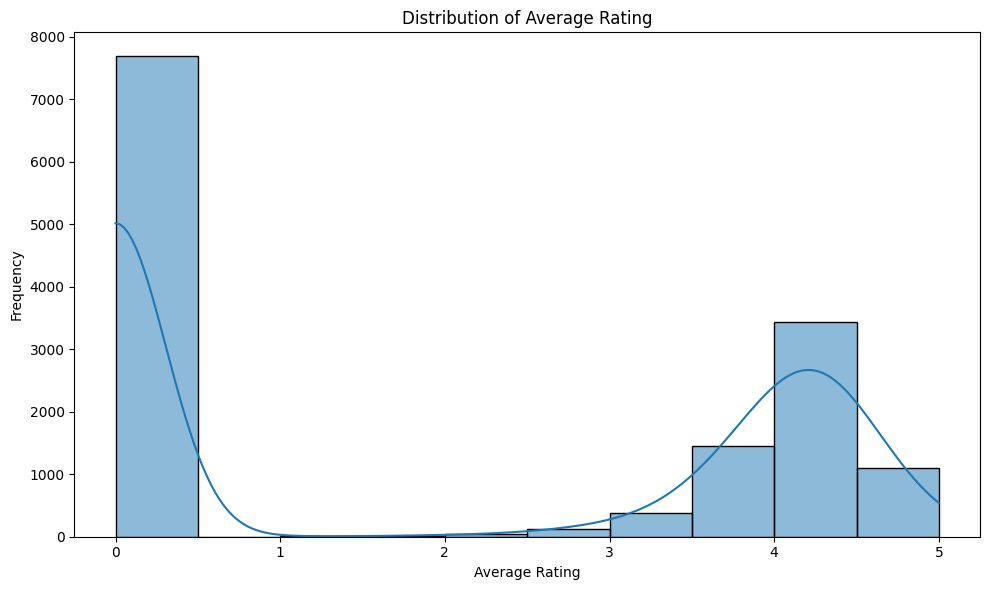

In [32]:
# Distribution plot of average rating
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_rating'], bins=10, kde=True)
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\Users\ganku\AppData\Local\Temp\ipykernel_8312\3599061080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='ratingcount', data=top_products, palette='viridis')


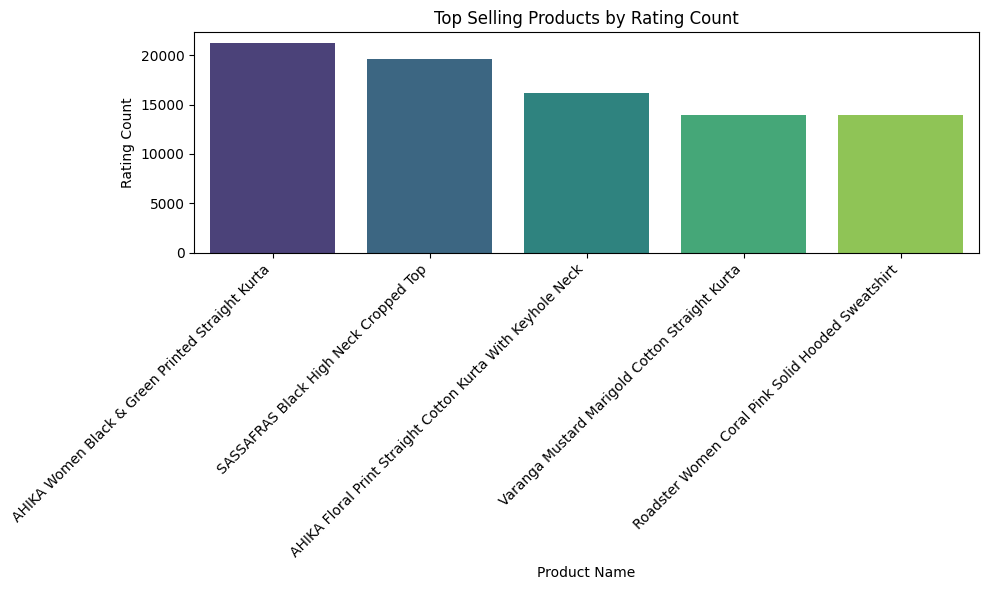

In [34]:
# Identify the top product(s) based on avg_rating or any other metric
top_products = df.sort_values(by='ratingcount', ascending=False).head(5)  # Top 5 products for example

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='ratingcount', data=top_products, palette='viridis')
plt.title('Top Selling Products by Rating Count')
plt.xlabel('Product Name')
plt.ylabel('Rating Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\ganku\AppData\Local\Temp\ipykernel_8312\3616929643.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='ratingcount', data=top_10_brands, palette='viridis')


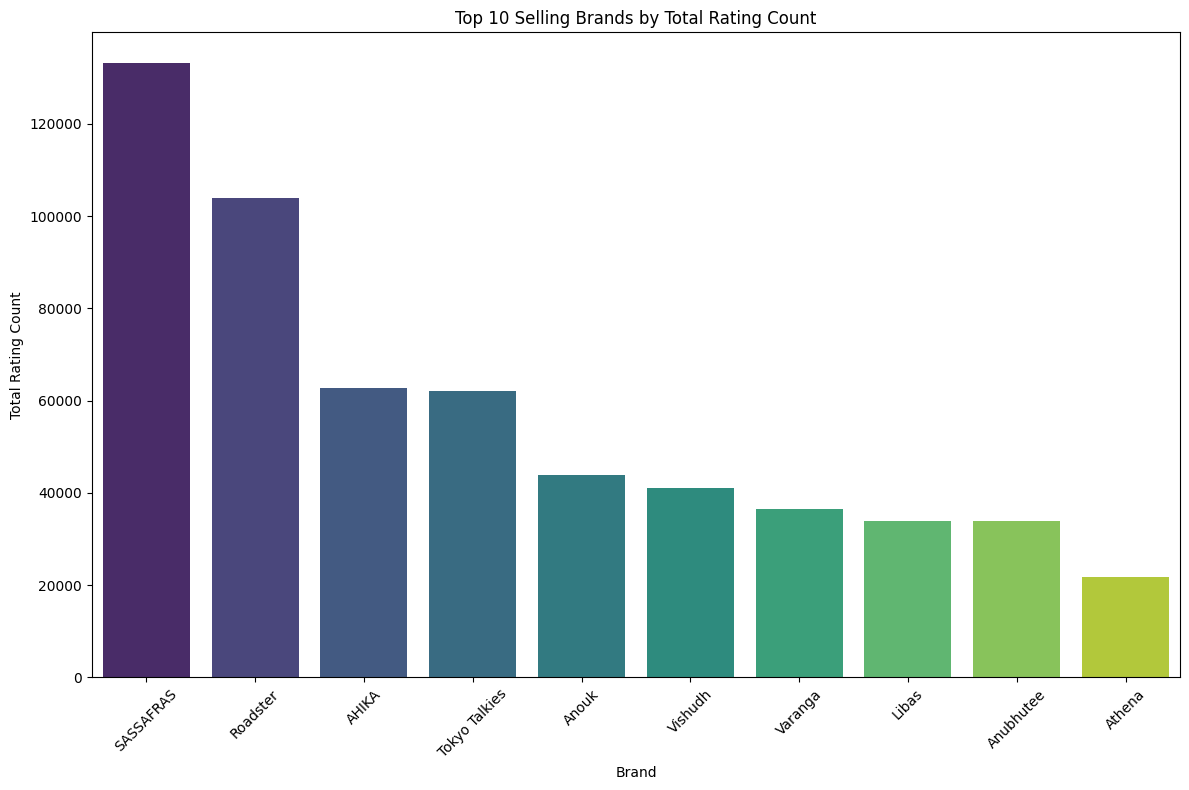

In [38]:
# Aggregate data by brand and sum up ratingcount
brand_sales = df.groupby('brand')['ratingcount'].sum().reset_index()

# Sort brands by total sales (ratingcount) in descending order and select top 10
top_10_brands = brand_sales.sort_values(by='ratingcount', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='brand', y='ratingcount', data=top_10_brands, palette='viridis')
plt.title('Top 10 Selling Brands by Total Rating Count')
plt.xlabel('Brand')
plt.ylabel('Total Rating Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()